In [92]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
#IMPORTING DATABASE
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Check for missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [95]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [96]:
df.duplicated().sum()

0

In [97]:
df.drop(columns=["other_fuel2","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [98]:
# Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
owner                              566       62.334802
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
year_of_capacity_data              388       42.731278
commissioning_year                 380       41.850220
longitude                           46        5.066079
latitude                            46        5.066079
geolocation_source                  19        2.092511
primary_fuel                         0        0.000000
country_long                         0        0.000000
source                               0        0.000000
url                                  0        0.000000
capacity_m

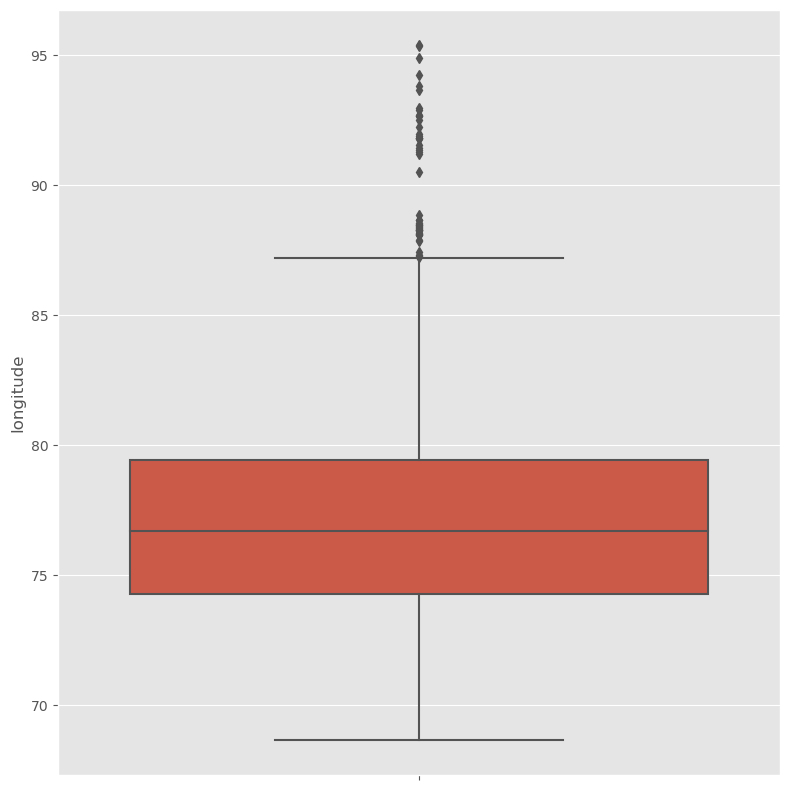

In [99]:
plt.figure(figsize=(8,8))
sns.boxplot(y='longitude',data=df)
plt.show()

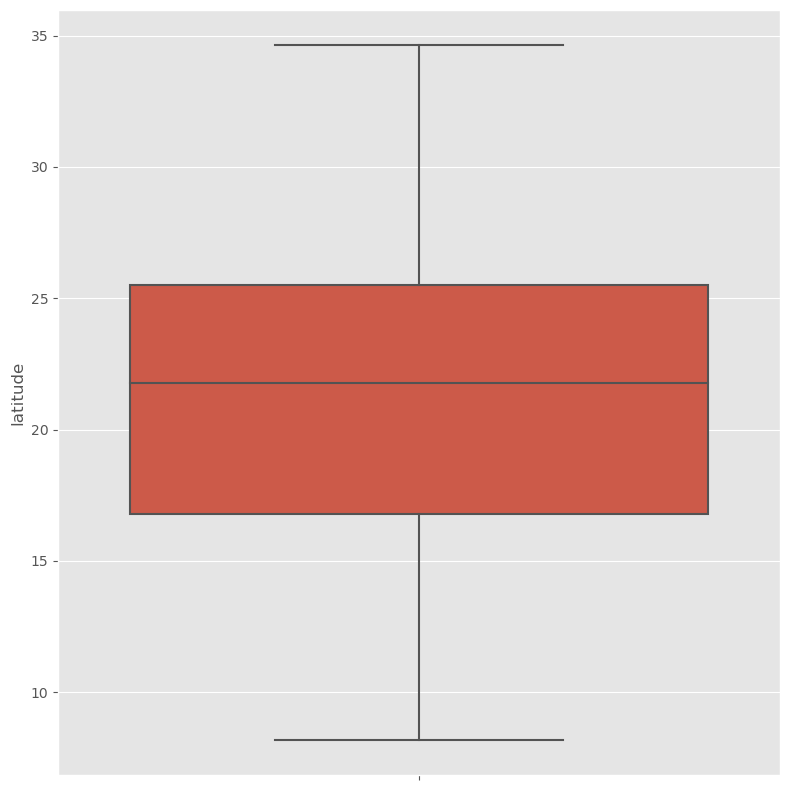

In [100]:
plt.figure(figsize=(8,8))
sns.boxplot(y='latitude',data=df)
plt.show()

In [101]:
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['longitude']= df['longitude'].fillna(df['longitude'].median())
df['latitude']= df['latitude'].fillna(df['latitude'].mean())

In [102]:
# Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
owner                              566       62.334802
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
year_of_capacity_data              388       42.731278
commissioning_year                 380       41.850220
primary_fuel                         0        0.000000
country_long                         0        0.000000
source                               0        0.000000
url                                  0        0.000000
geolocation_source                   0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
capacity_m

In [103]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.410936,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.783873,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.278850,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [104]:
df.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)

# Regression Target Variable- Capacity

In [105]:
print("Minimum Capacity of Power Plant:",df.capacity_mw.min())
print("Maximum Capacity of Power Plant:",df.capacity_mw.max())

Minimum Capacity of Power Plant: 0.0
Maximum Capacity of Power Plant: 4760.0


In [106]:
df.loc[df.capacity_mw==0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
830,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Tata BP Solar India Limited,http://www.tatabpsolar.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.loc[df.capacity_mw==4760]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
881,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,Oil,2002.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,26761.39,27594.0,29047.0,30015.0,35116.0,Central Electricity Authority


In [ ]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='capacity_mw',data=df)

In [ ]:
df.loc[df.capacity_mw>1500].shape

In [112]:
# Checking Cpacity according to Primary fuel
pd.crosstab(df['capacity_mw'],df['primary_fuel'],margins=True).T

capacity_mw,0.0,1.0,1.5,1.7,1.8,2.0,2.1,2.25,2.4,2.5,...,2630.0,2920.0,2980.0,3000.0,3300.0,3960.0,4000.0,4620.0,4760.0,All
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Coal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,1,259
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
Solar,1,17,0,0,1,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,127
Wind,0,1,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,123
All,1,18,3,2,1,6,2,1,1,1,...,1,1,1,2,1,1,1,1,1,908


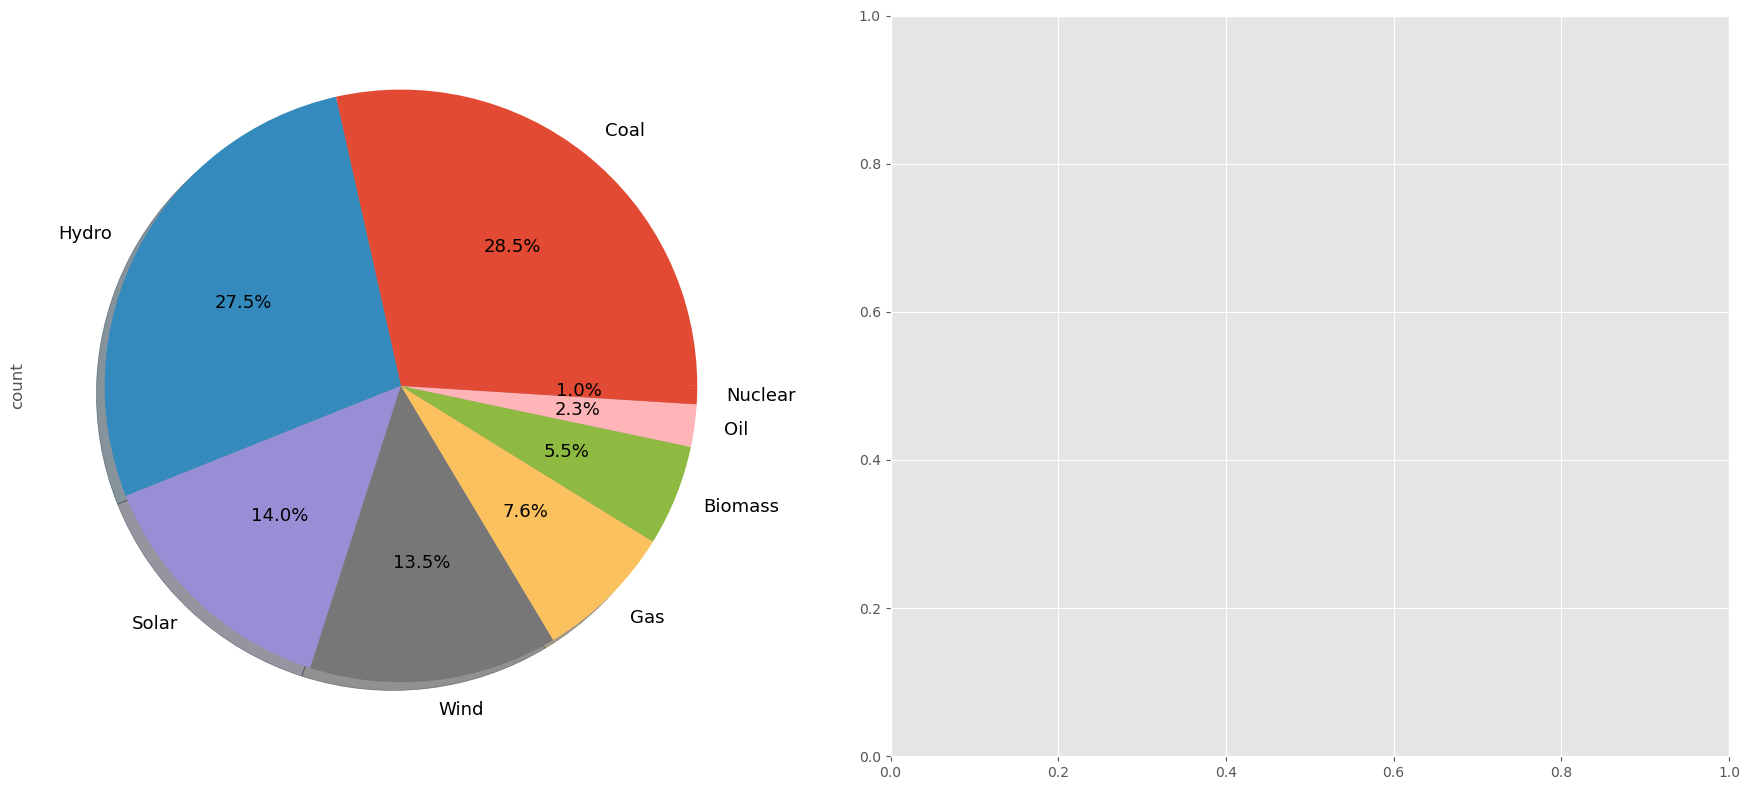

In [126]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
plt.show()


In [127]:
df.primary_fuel.value_counts()

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [128]:
print("Total Power Generation of all power plant:",df['capacity_mw'].sum(),'MW')

Total Power Generation of all power plant: 291510.11100000003 MW


In [129]:
# Checking Power Generation capacity based on sector
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,201423.220
Gas,25123.871
Hydro,46331.570
Nuclear,8780.000
Oil,1978.840
Solar,2757.500
Wind,4111.850


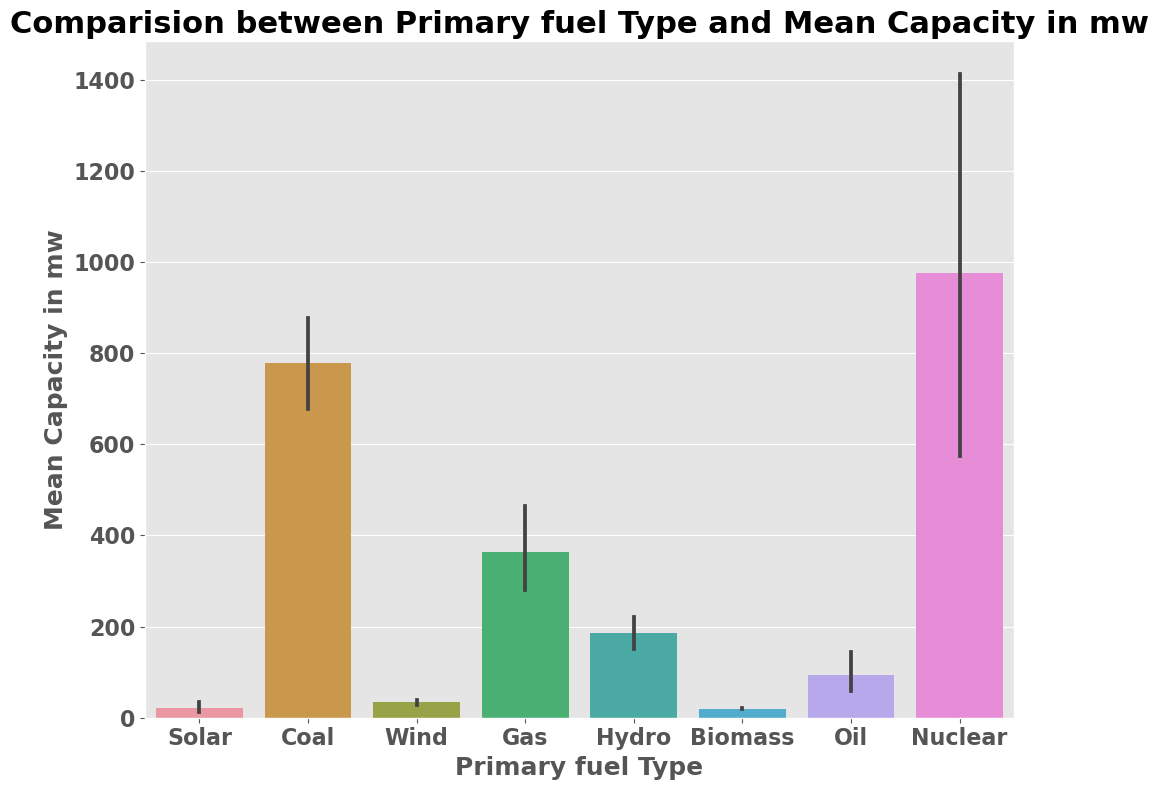

In [130]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=0)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

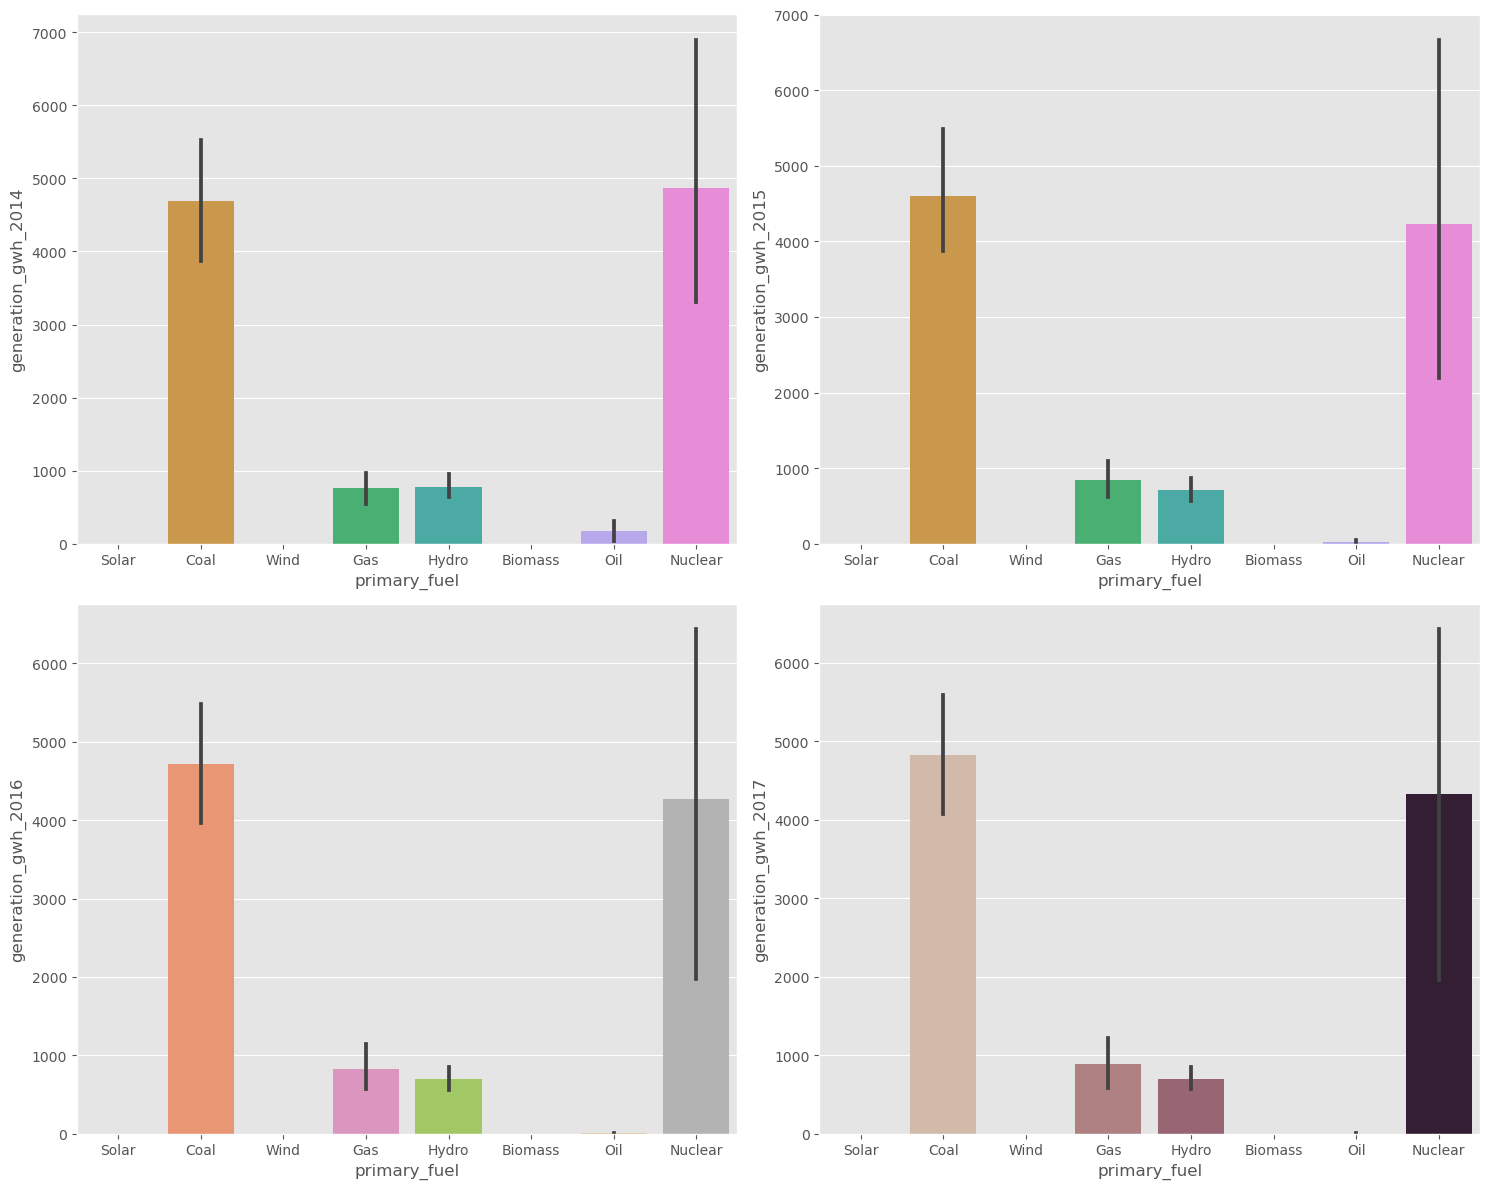

In [131]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")



In [139]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [140]:
df.loc[df.Power_plant_age==91]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Power_plant_age
729,IND,India,SIVASAMUNDRUM,IND0000418,42.0,12.3082,77.165,Hydro,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,217.97465,220.82035,215.3777,144.4143,175.92595,Central Electricity Authority,91.0


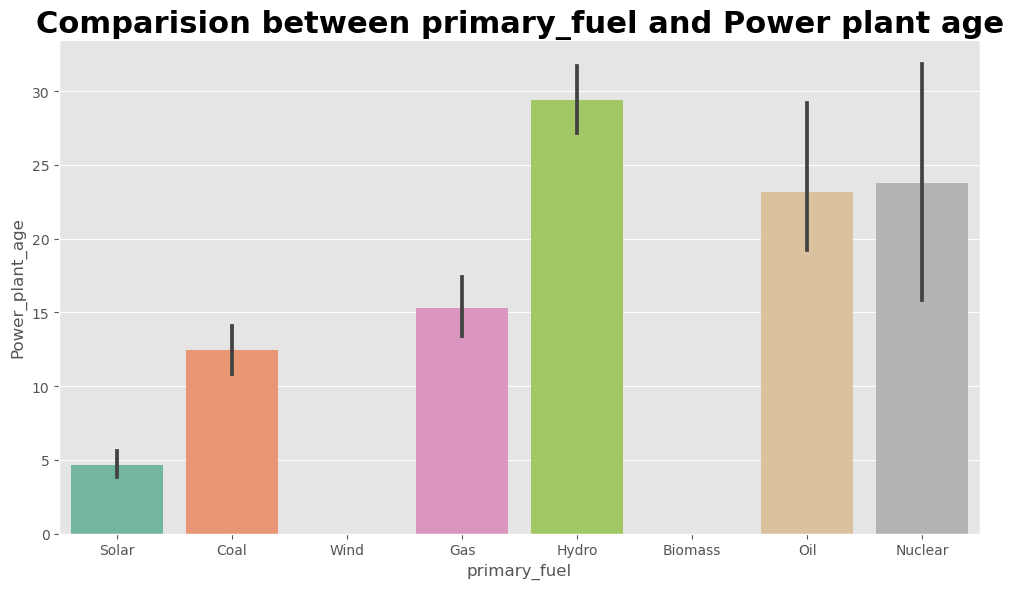

In [141]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()


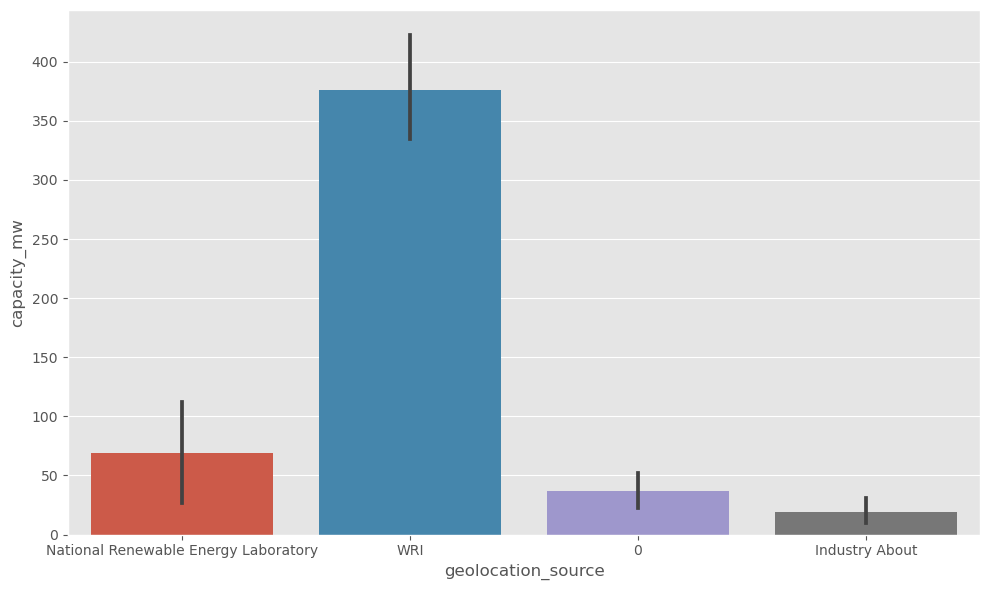

In [45]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

# Distribution of features

In [143]:
# Separating Numerical and Categorical Columns
# Checking for categoricalcolumns:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    print("Categorical Columns:",categorical_col)
print("\n")

Categorical Columns: ['country']
Categorical Columns: ['country', 'country_long']
Categorical Columns: ['country', 'country_long', 'name']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source']
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url']
Categorical Columns: ['country', 'cou

In [144]:
# Checking for Numerical Columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
    print("Numerical Columns:",numerical_col)

Numerical Columns: []
Numerical Columns: []
Numerical Columns: []
Numerical Columns: []
Numerical Columns: ['capacity_mw']
Numerical Columns: ['capacity_mw', 'latitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generati

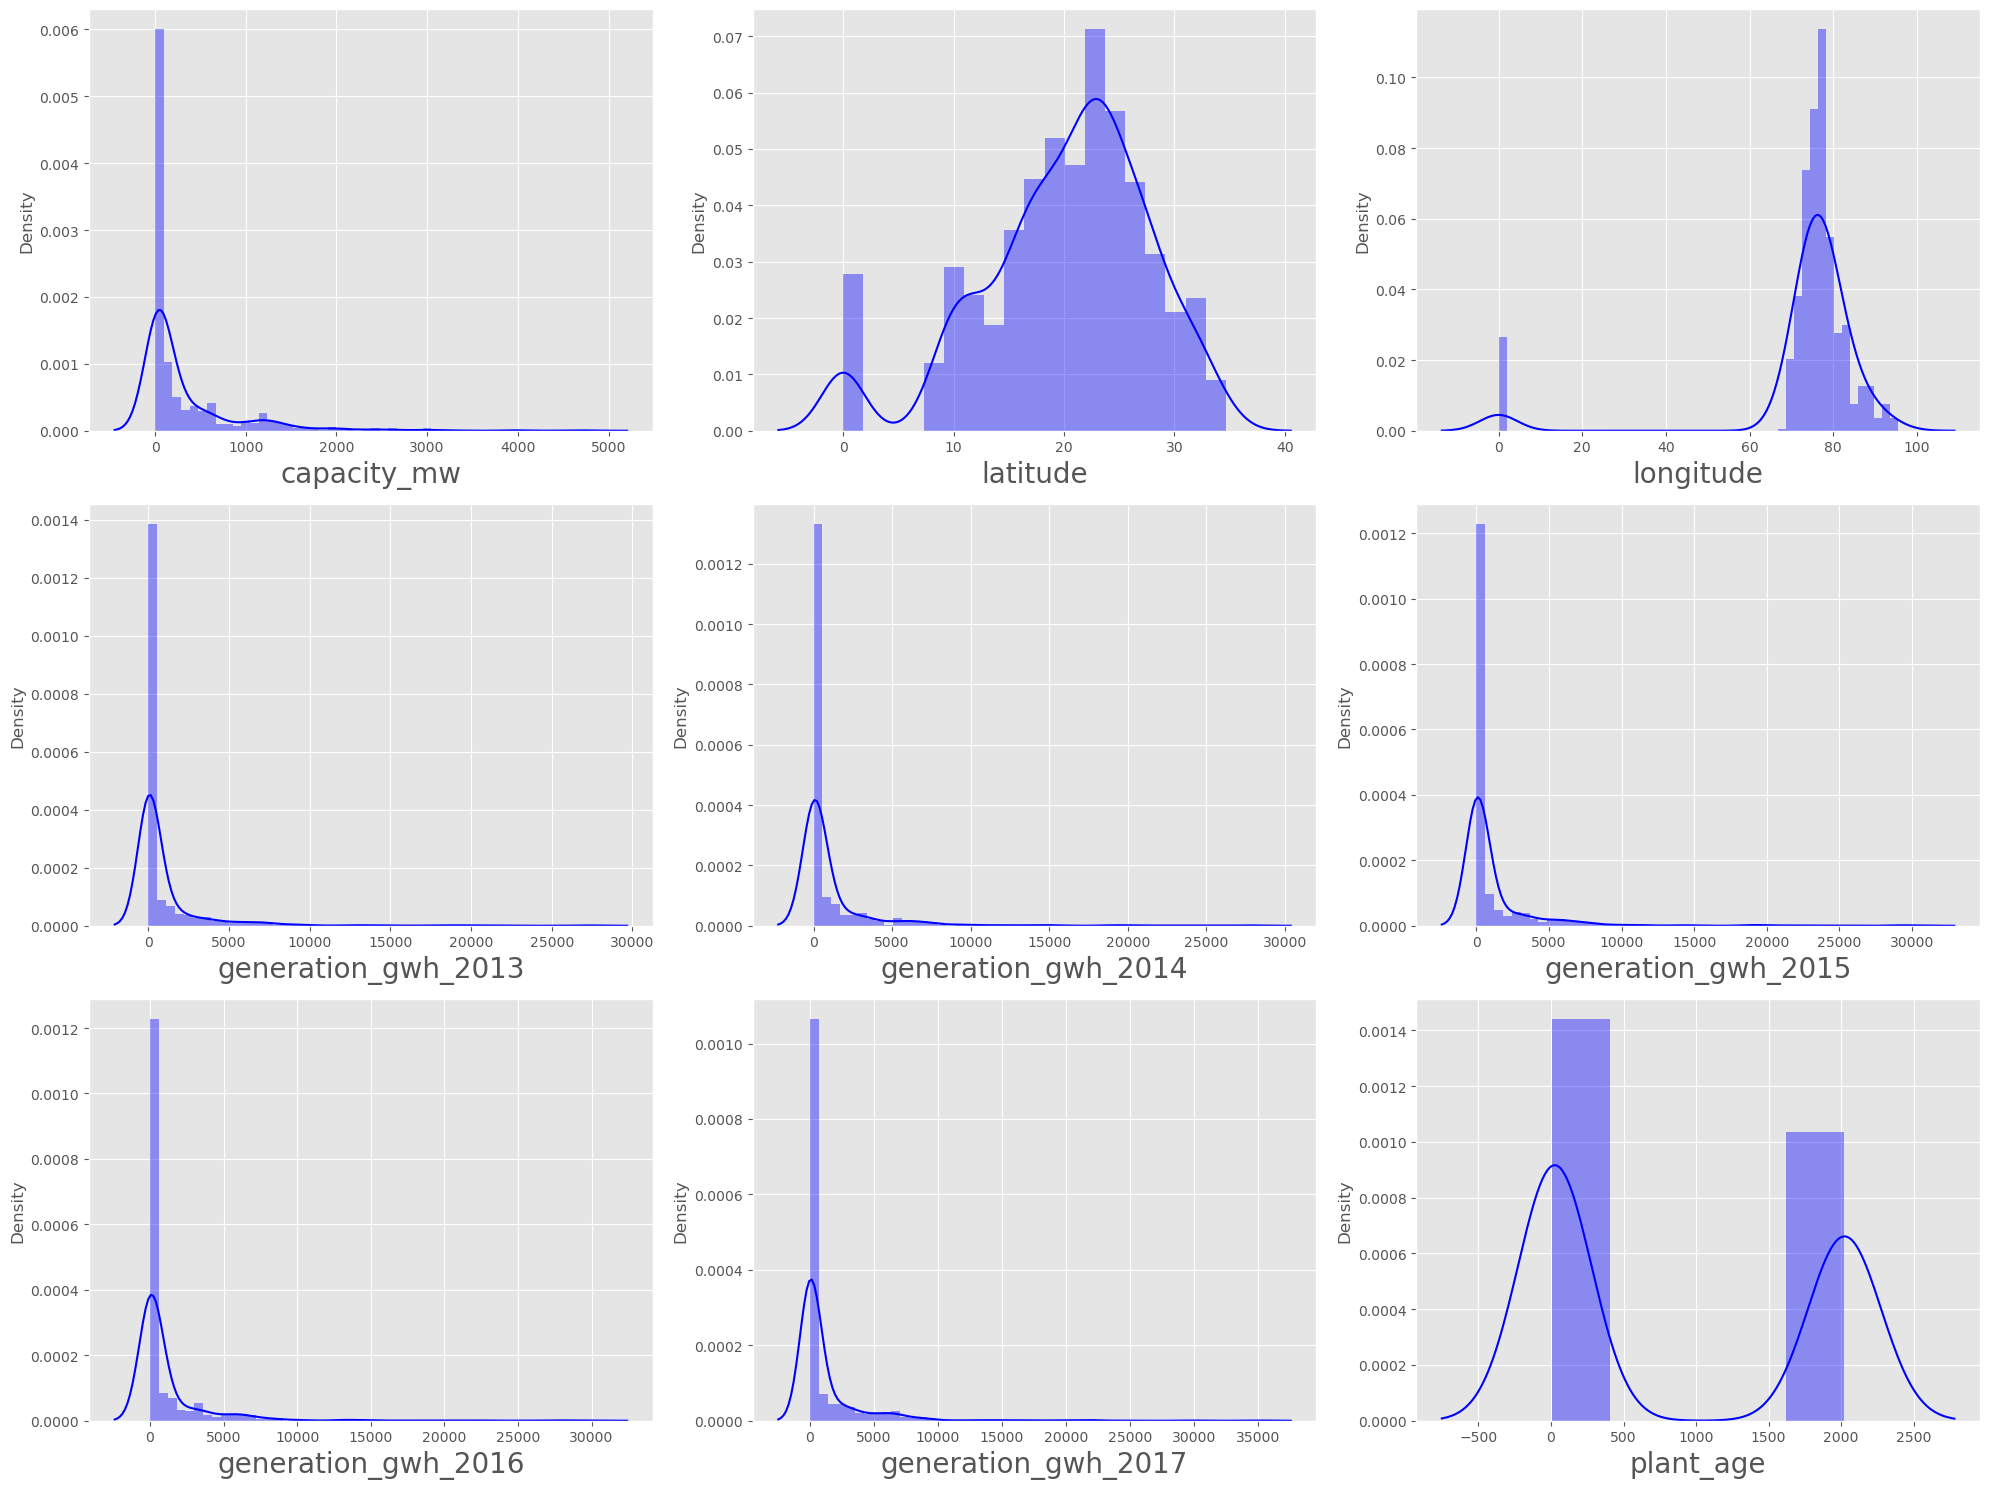

In [49]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

ValueError: Could not interpret value `generation_gwh_2018` for parameter `x`

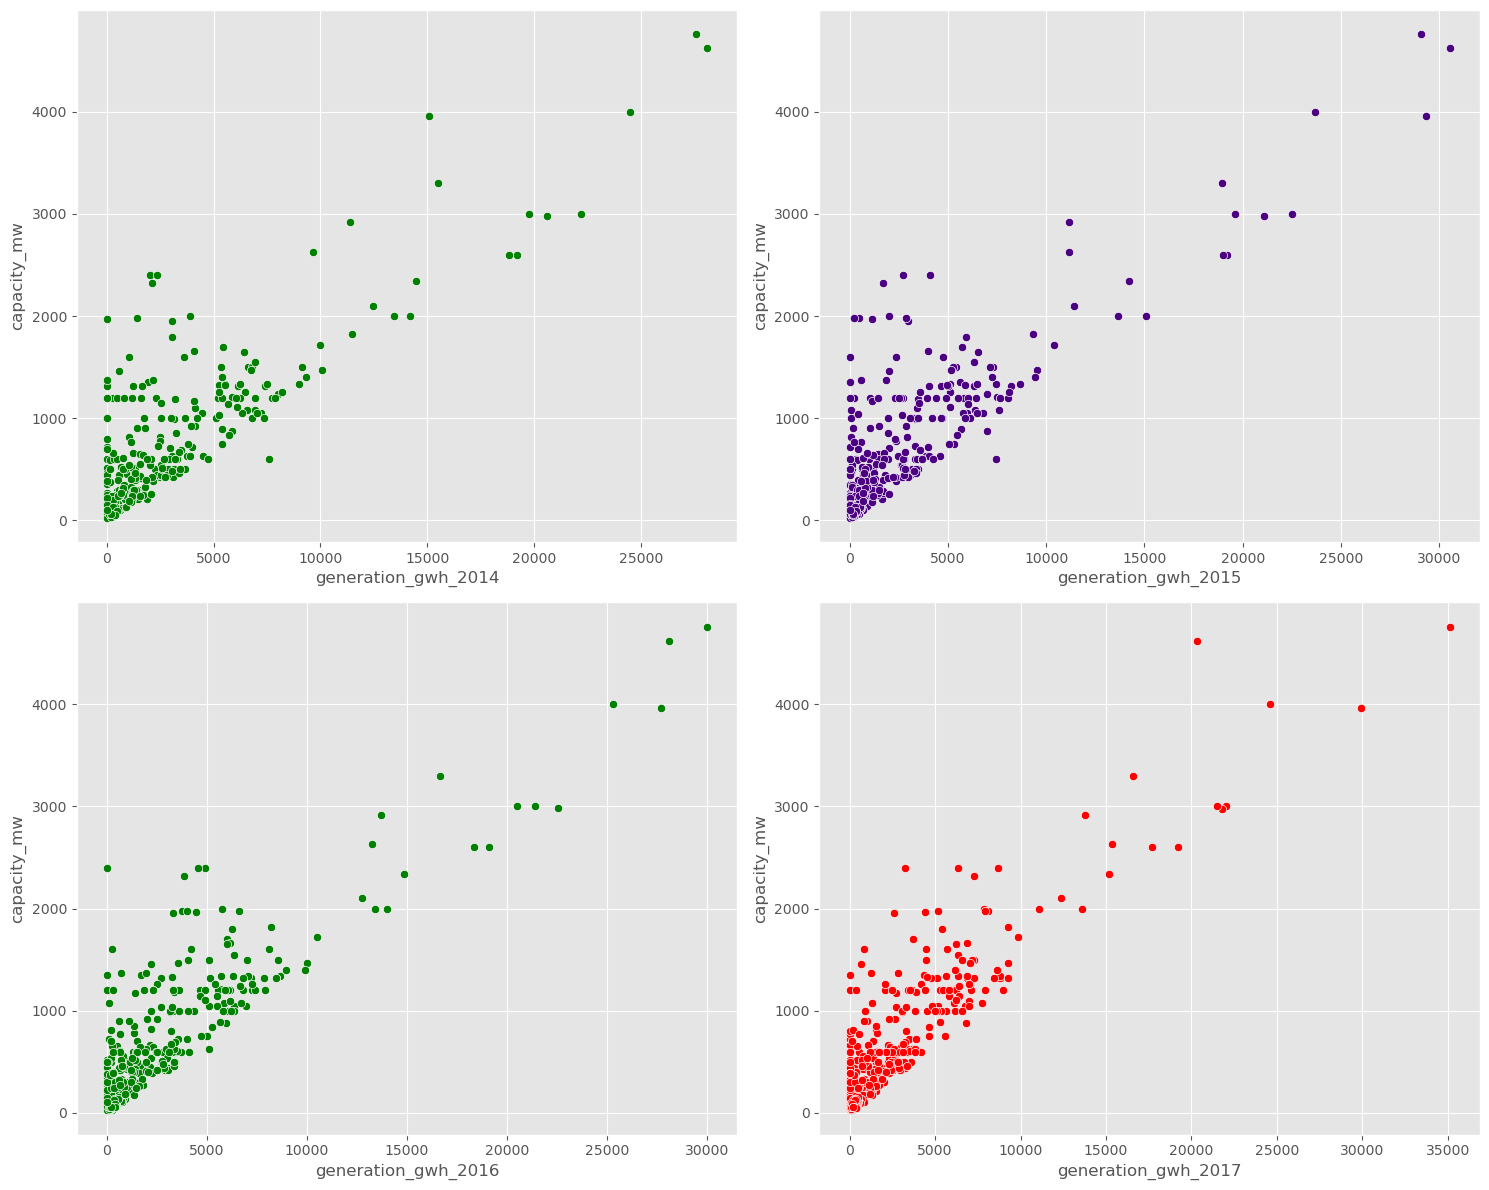

In [145]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")

## Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="b")
plt.show()

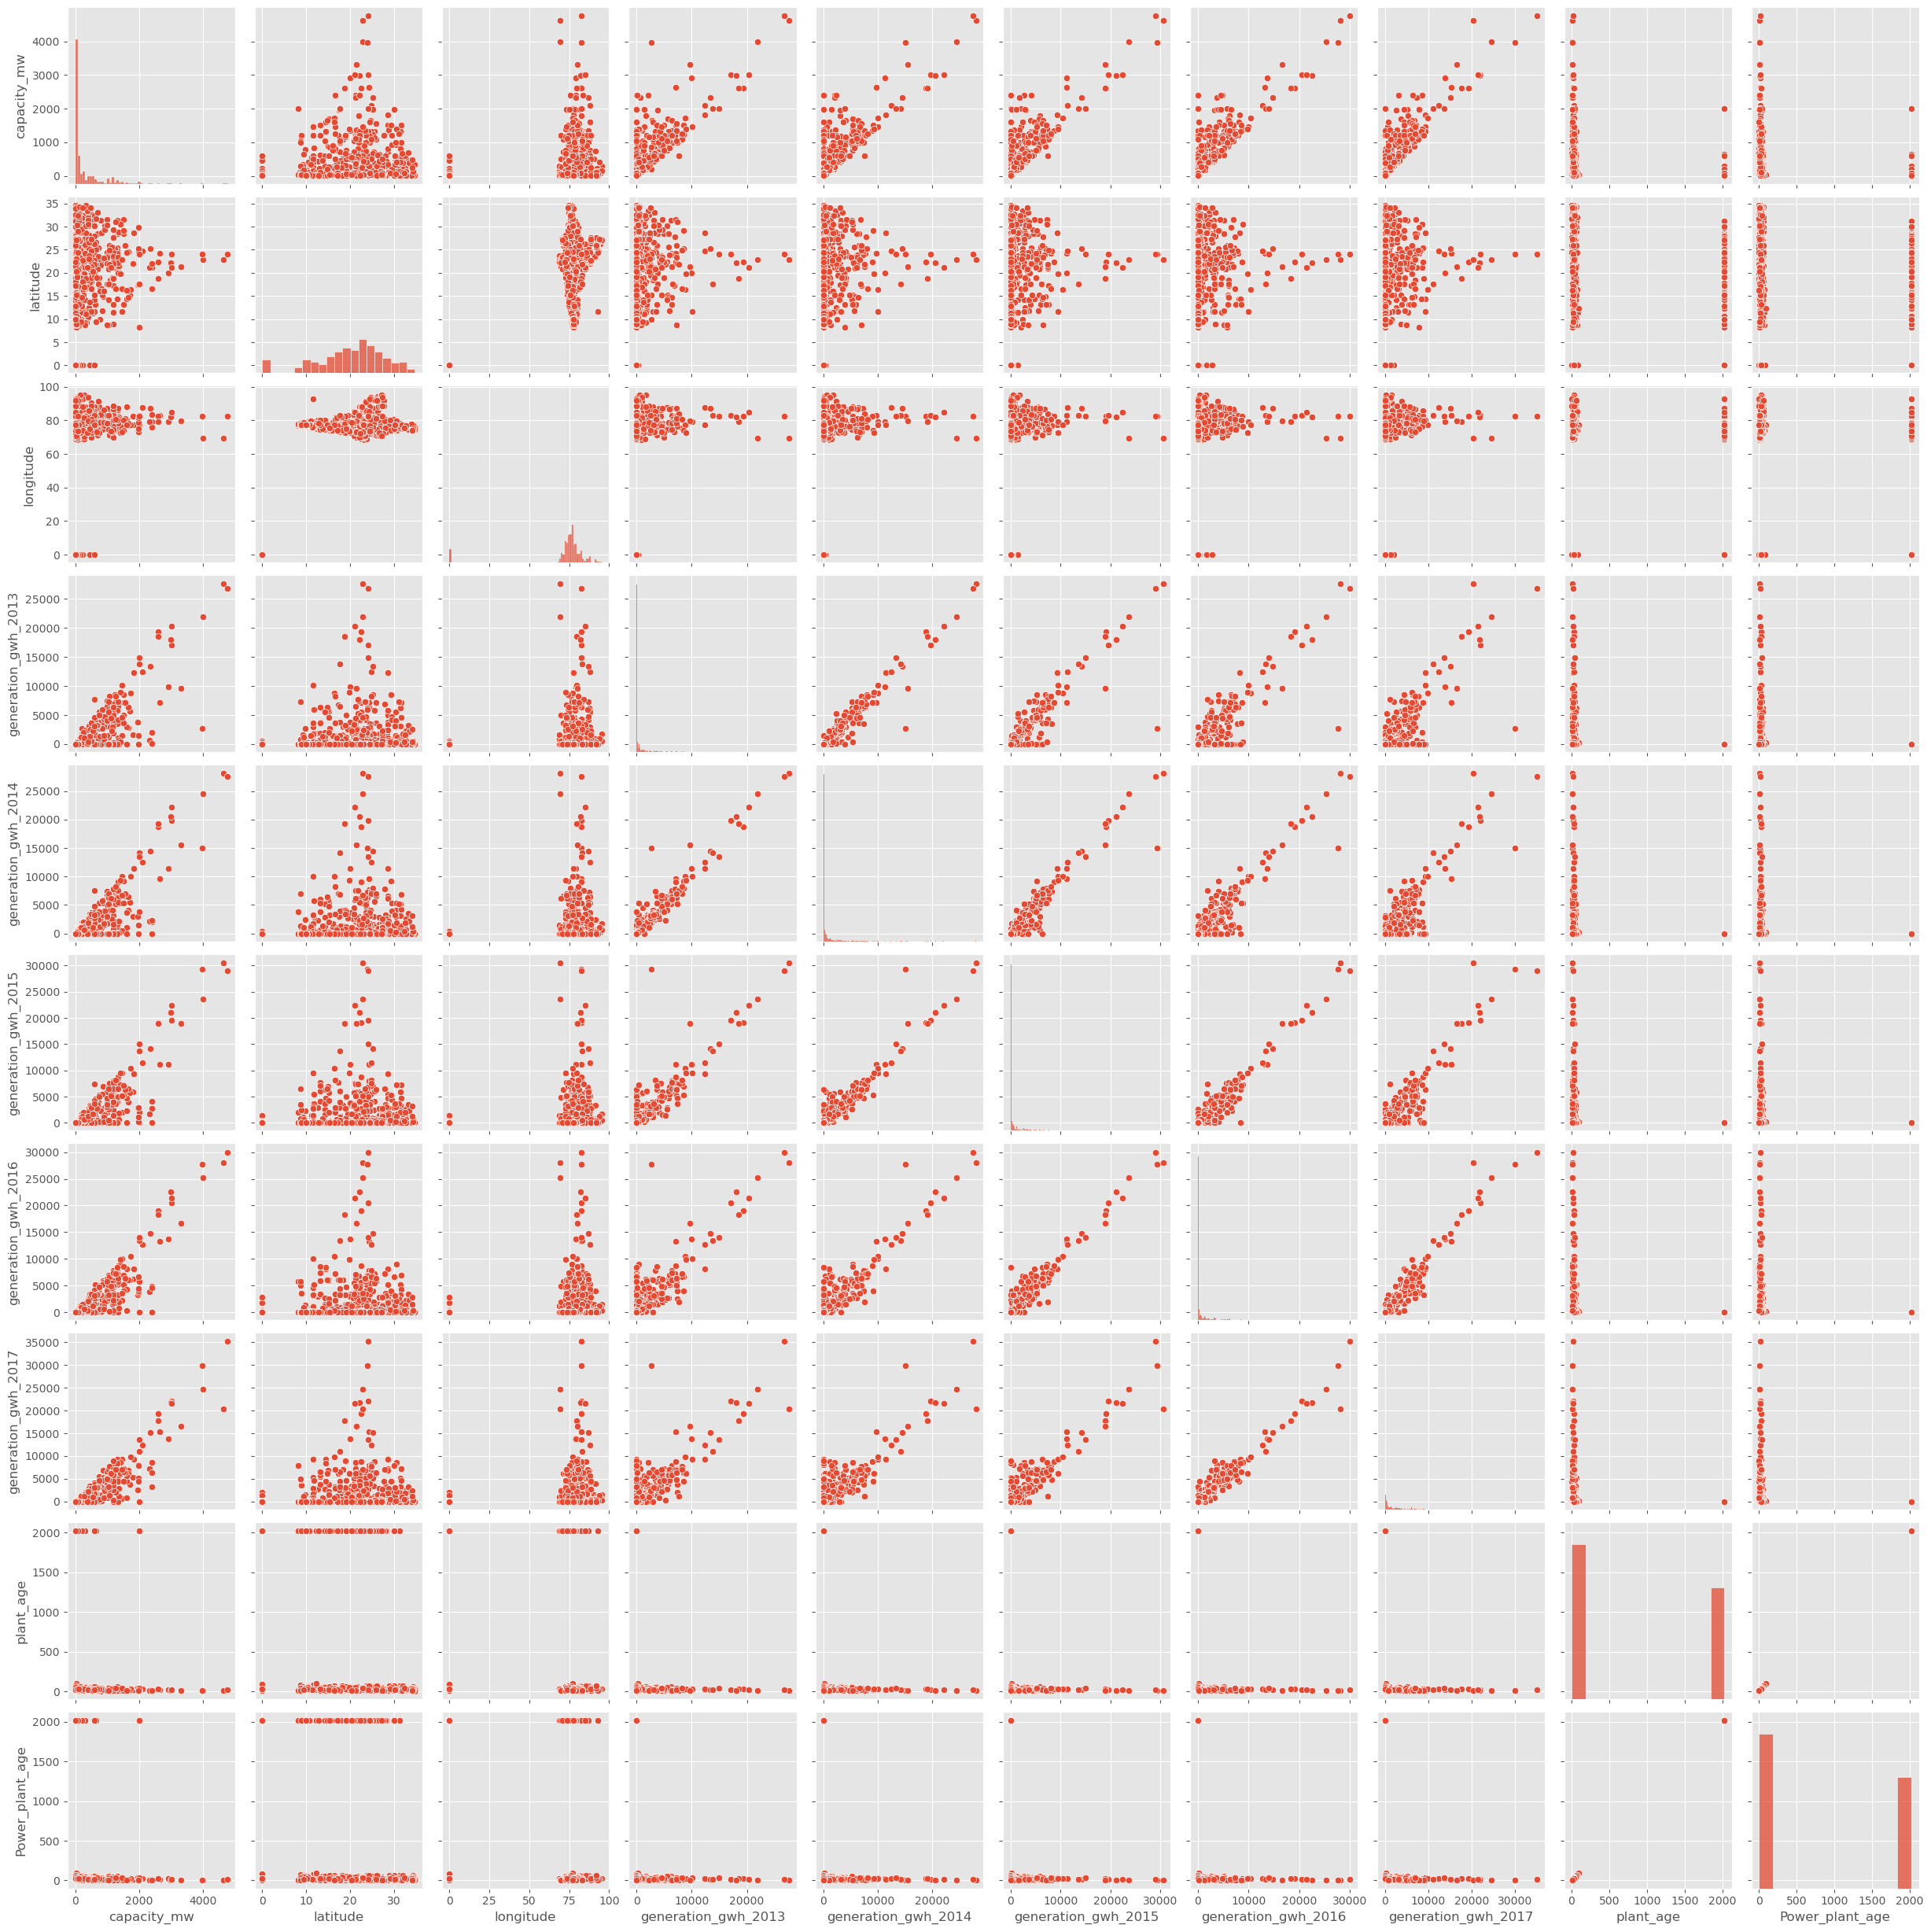

In [51]:
sns.pairplot(df)

In [146]:
df.drop(columns=['name'],axis=1,inplace=True)

In [147]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [148]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [149]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,0.0,0.0,658.0,9.0,731.0,143.0,6.0,NaN,229.0,109.0,128.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0
1,0.0,0.0,520.0,180.0,594.0,234.0,1.0,NaN,258.0,174.0,173.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,854.0,122.0,421.0,8.0,7.0,NaN,2.0,21.0,205.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,204.0,547.0,808.0,2.0,NaN,NaN,22.0,58.0,2.0,158.0,157.0,198.0,199.0,178.0,14.0
4,0.0,0.0,1.0,345.0,424.0,704.0,1.0,2.0,NaN,22.0,58.0,2.0,228.0,274.0,350.0,361.0,340.0,3.0


# Outliers detection and removal

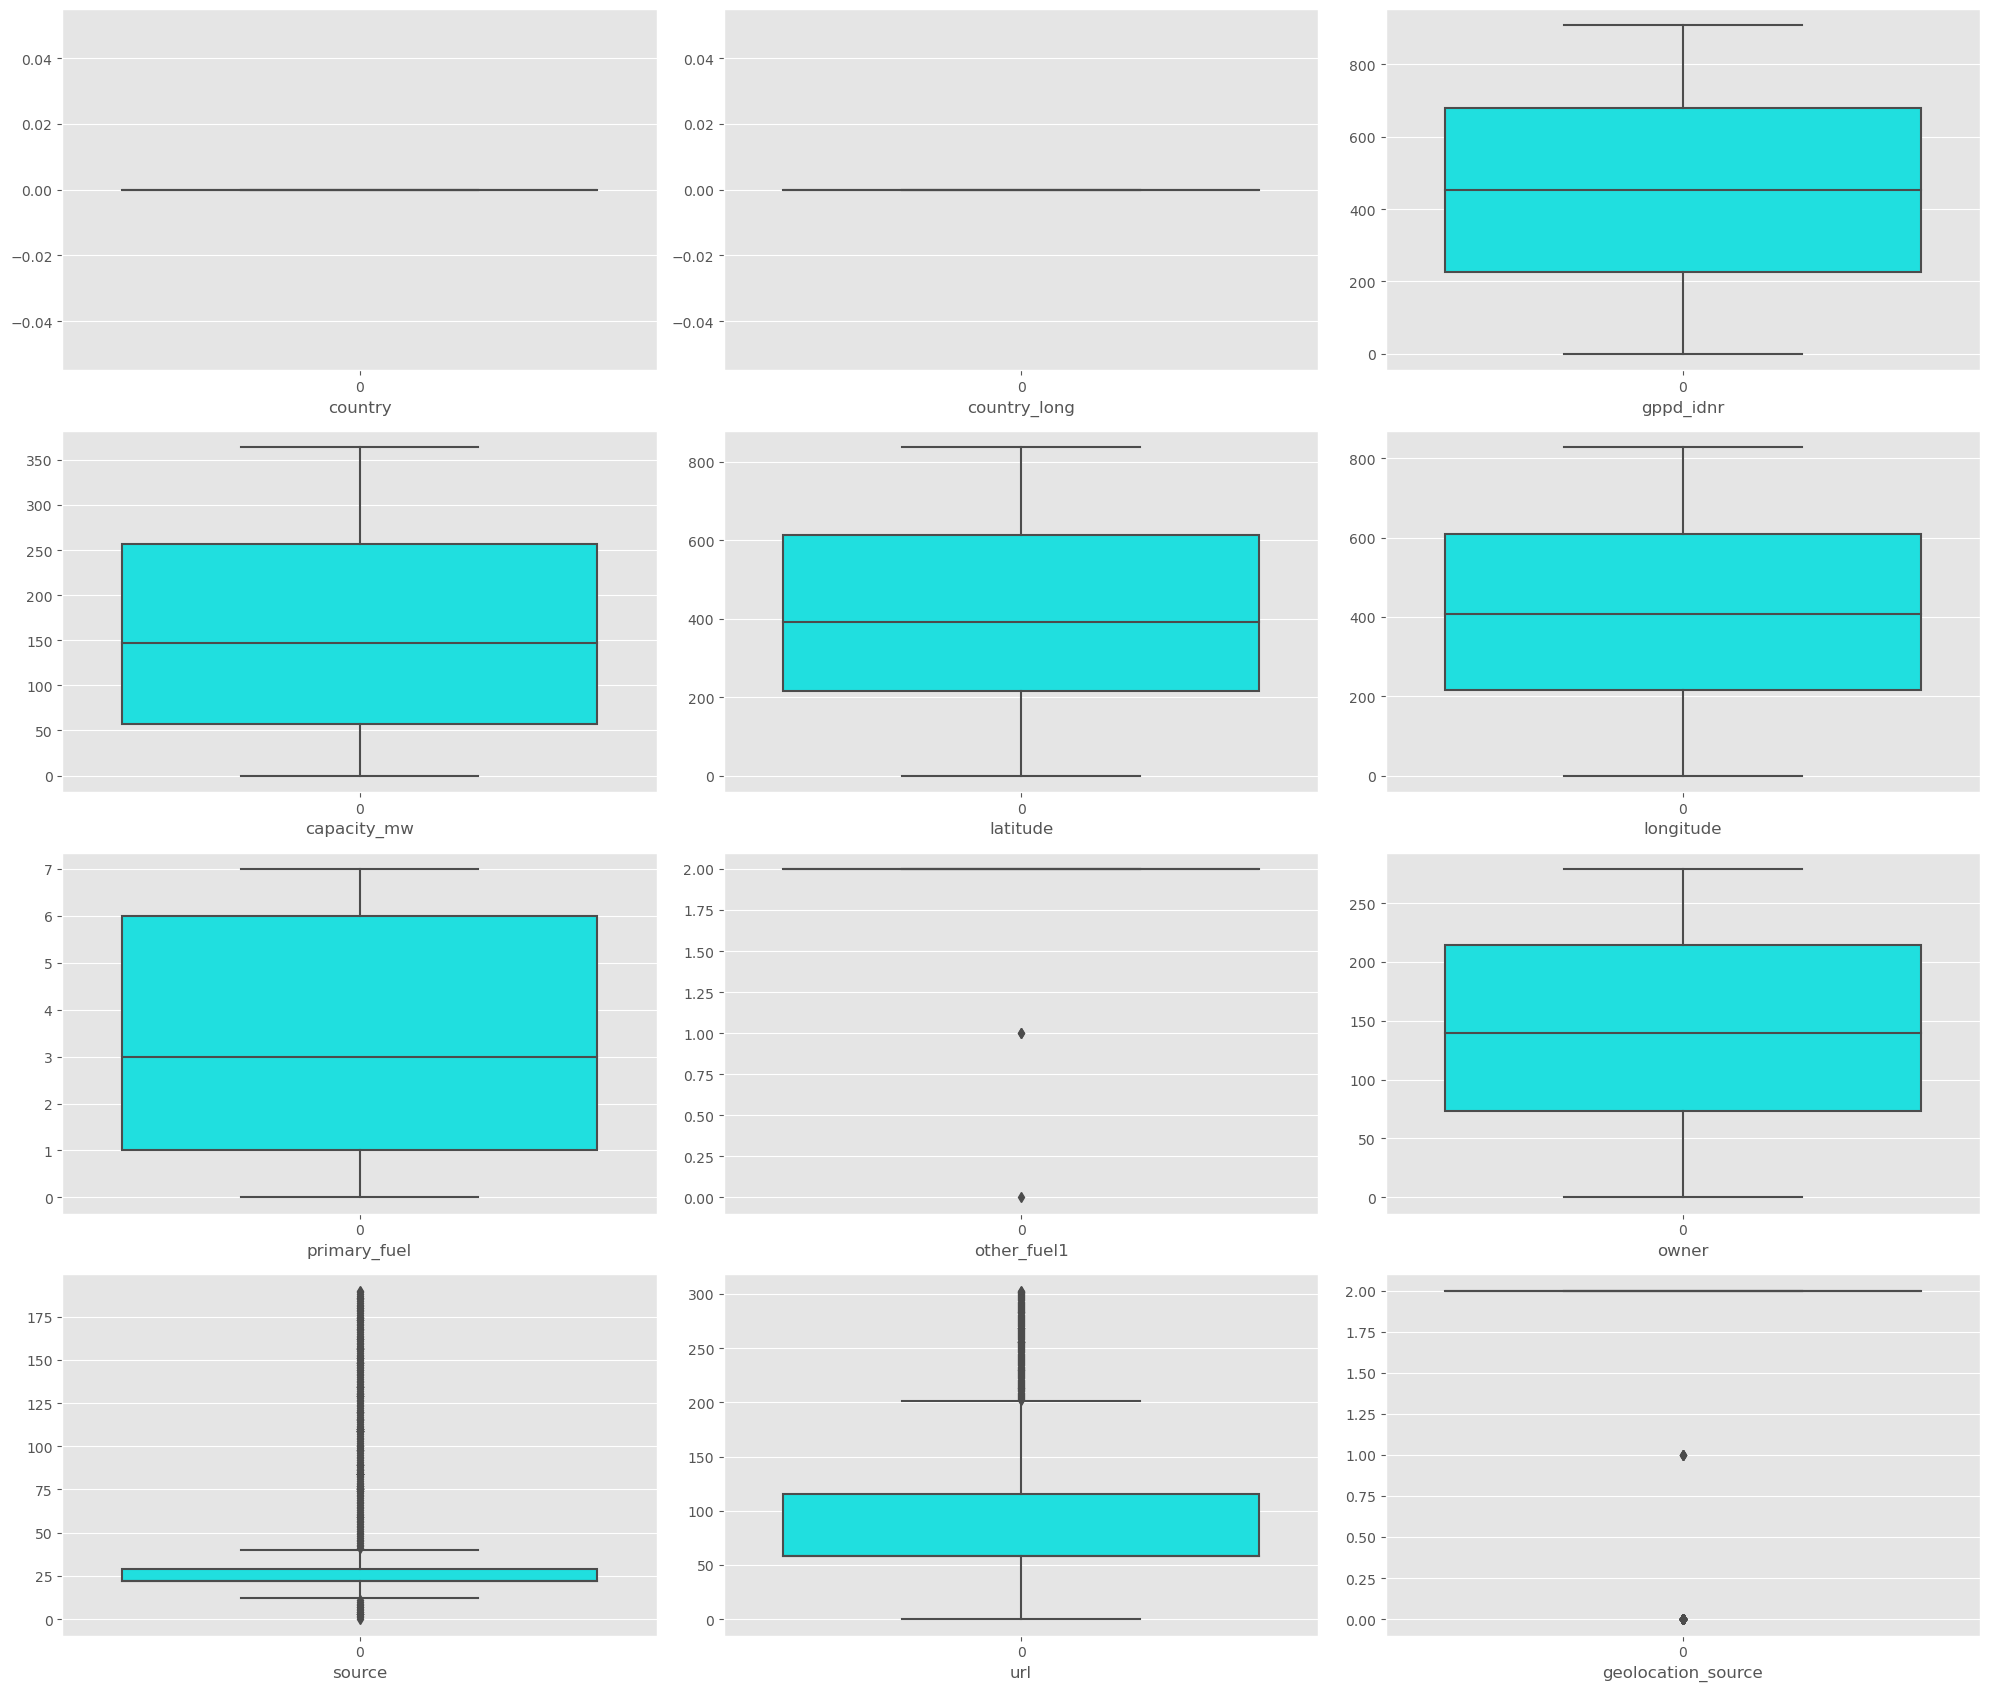

In [150]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [151]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [152]:
df2=df.copy

In [153]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

country                  0.00
country_long             0.00
gppd_idnr              770.95
capacity_mw            292.00
latitude               703.95
longitude              693.95
primary_fuel             6.00
other_fuel1              2.00
owner                  236.00
url                    178.95
generation_gwh_2013    305.55
generation_gwh_2014    313.00
generation_gwh_2015    333.40
generation_gwh_2016    339.60
generation_gwh_2017    342.70
Power_plant_age         39.00
dtype: float64


In [154]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(908, 16)


Data Loss

In [155]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


Correlation matrix

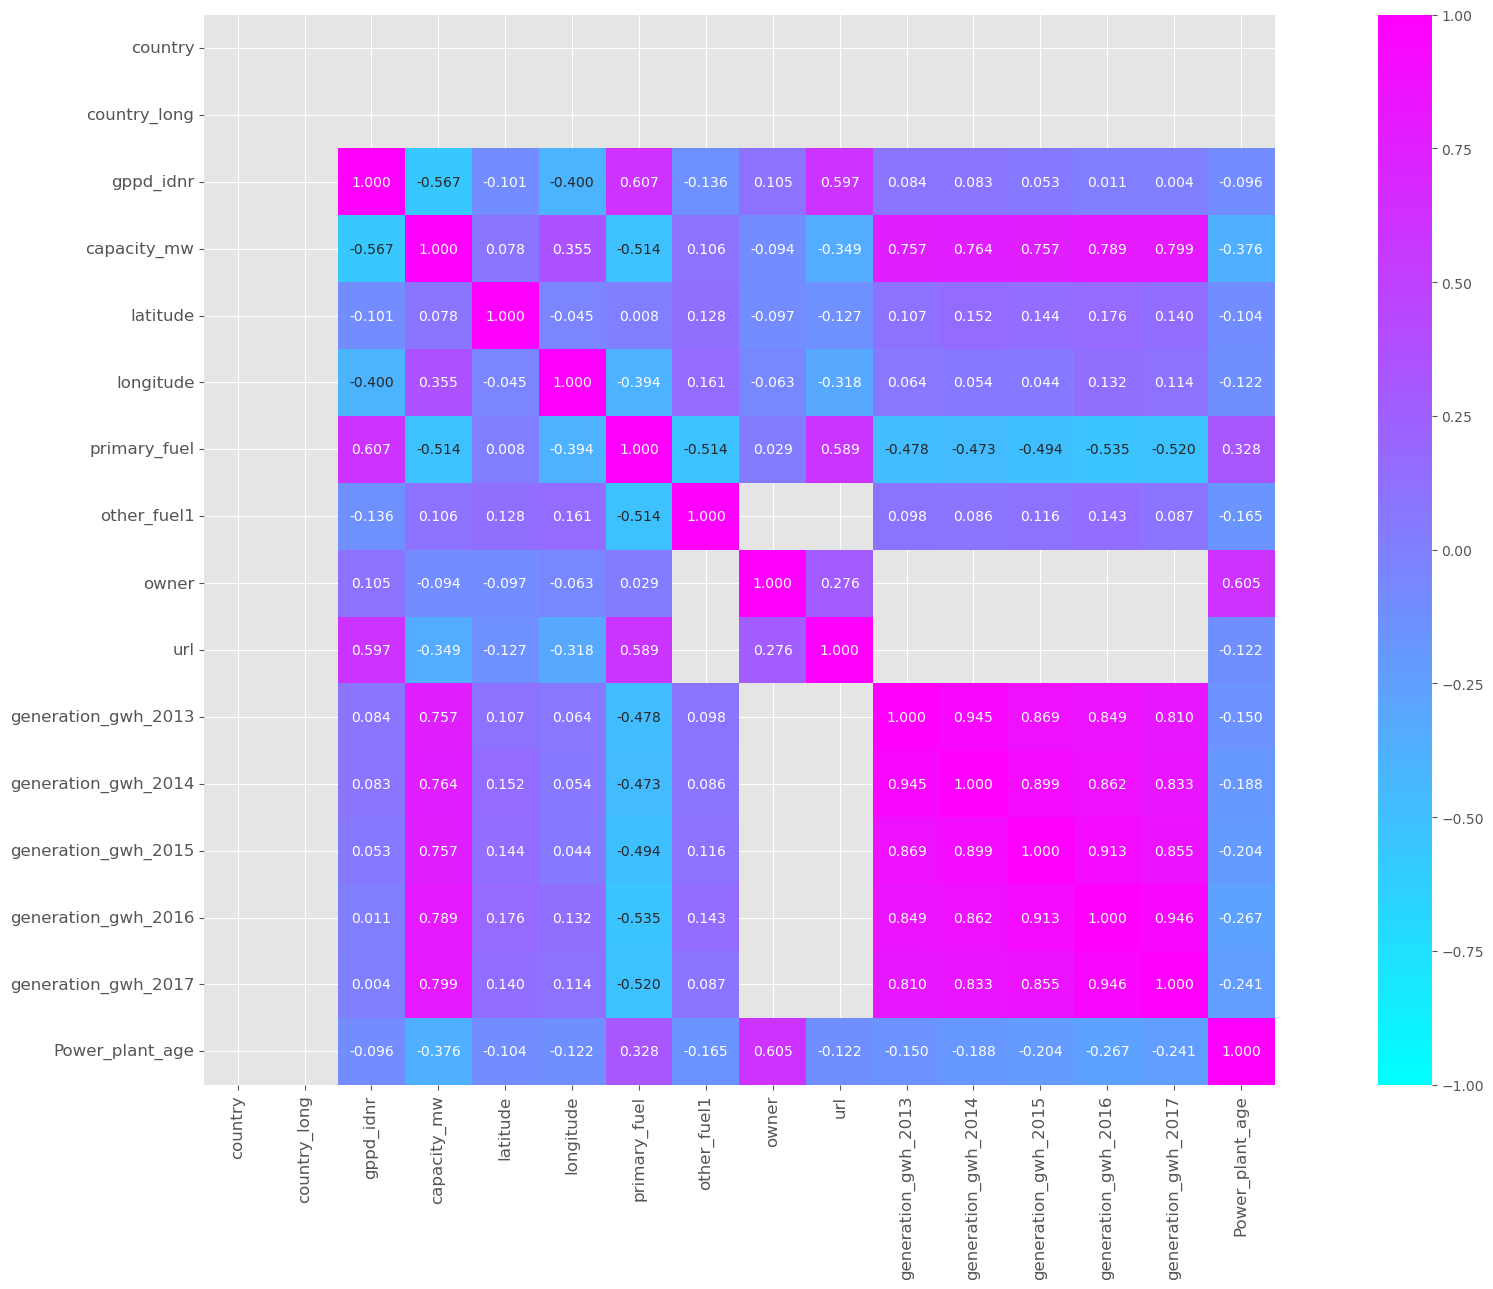

In [156]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

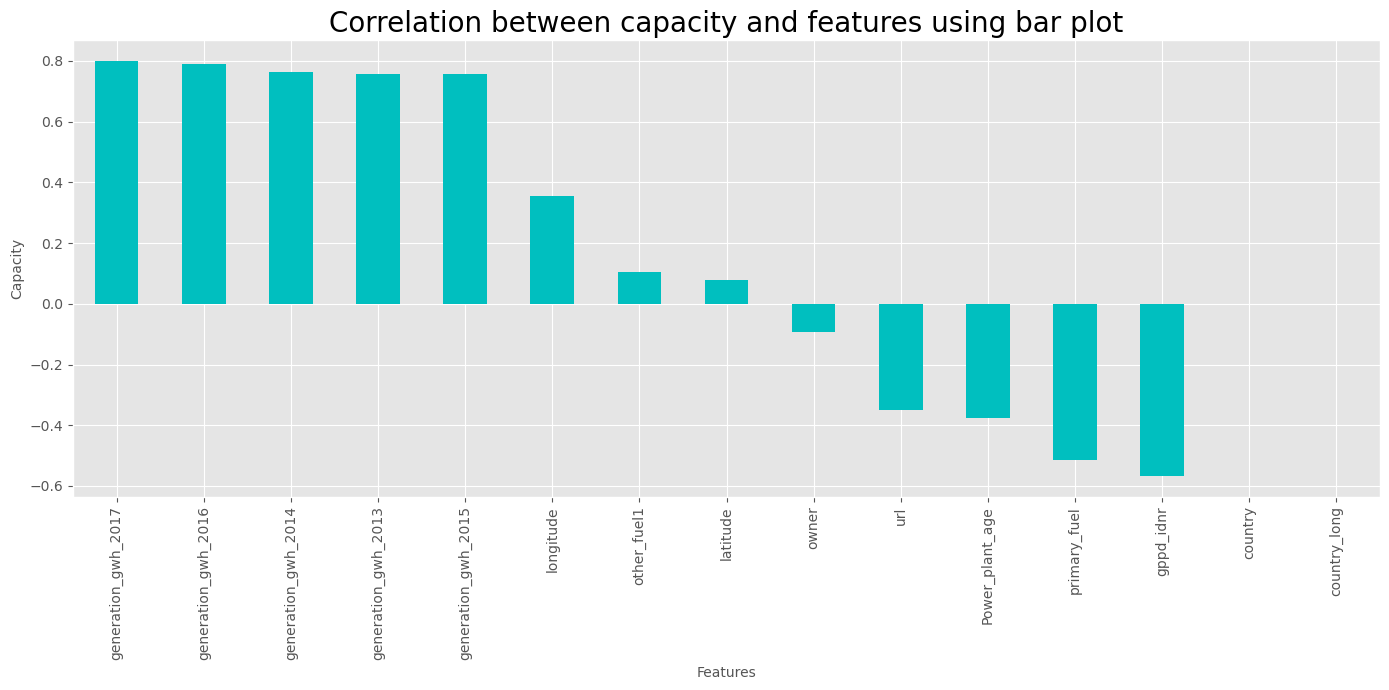

In [157]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

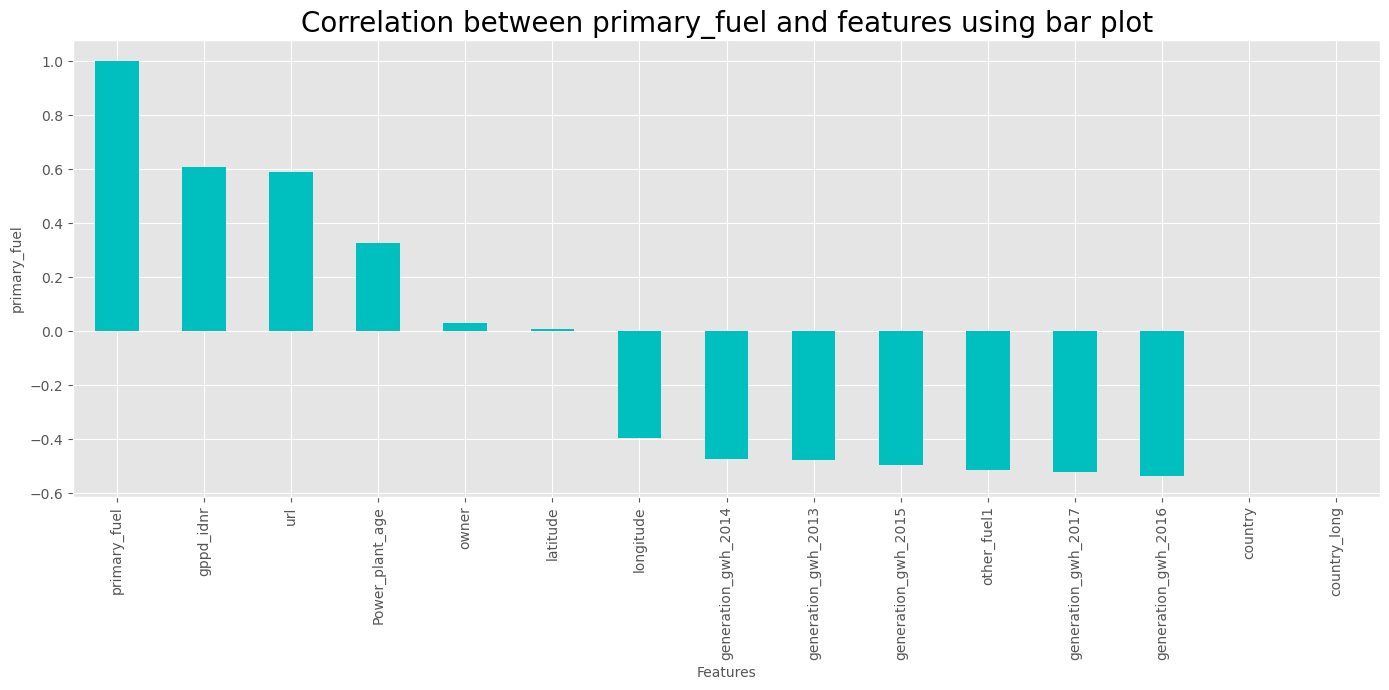

In [158]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [159]:
data.skew()

country                0.000000
country_long           0.000000
gppd_idnr              0.000000
capacity_mw            0.228620
latitude               0.038293
longitude              0.016379
primary_fuel           0.471141
other_fuel1           -9.515295
owner                 -0.041621
url                    1.512258
generation_gwh_2013    0.024442
generation_gwh_2014    0.038381
generation_gwh_2015    0.034590
generation_gwh_2016    0.034945
generation_gwh_2017    0.047852
Power_plant_age        0.944024
dtype: float64

In [163]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [164]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.139328,NaN,NaN,NaN,NaN,NaN,-0.806556
1,-0.681285,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.068842,NaN,NaN,NaN,NaN,NaN,NaN
3,1.543318,NaN,0.031214,0.246450,0.236896,0.090687,-0.164044
4,1.186329,0.123718,0.859648,1.199292,1.219608,1.085383,-1.397723


In [165]:
# checking skewness after using yeo-johnson
data.skew()

country                0.000000
country_long           0.000000
gppd_idnr              0.000000
capacity_mw            0.228620
latitude               0.038293
longitude             -0.273218
primary_fuel           0.471141
other_fuel1           -8.019763
owner                 -0.041621
url                    1.512258
generation_gwh_2013    0.024442
generation_gwh_2014   -0.445091
generation_gwh_2015   -0.442343
generation_gwh_2016   -0.453505
generation_gwh_2017   -0.455193
Power_plant_age       -0.075194
dtype: float64

In [166]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [167]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [168]:
data['owner'] = data['owner'].fillna(data['owner'].mean())

In [169]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

Now we have done EDA so,its time for removal of missing data

In [170]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [172]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data["primary_fuel"]

In [173]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (635, 10)
Training target vector size: (635,)
Test feature matrix size: (273, 10)
Test target vector size: (273,)


# Finding best Random state

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.7838827838827839


Confusion matrix of DecisionTreeClassifier : 
 [[ 9  3  0  0  0  0  0  0]
 [ 5 57  3  9  0  0  0  0]
 [ 0  7  2  8  0  2  0  0]
 [ 0 12  2 60  0  2  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  3  0  3  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0 38]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.70      0.77      0.74        74
         2.0       0.25      0.11      0.15        19
         3.0       0.75      0.79      0.77        76
         4.0       0.00      0.00      0.00         1
         5.0       0.43      0.38      0.40         8
         6.0       1.00      1.00      1.00        45
         7.0       1.00      1.00      1.00        38

    accuracy                           0.78       273
   macro avg       0.60      0.60      0.5

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: Input X contains NaN.
ExtraTreesClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Cross Validation

In [186]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Hyper Parameter Tuning : GridSearchCV

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [189]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=aut

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=nan total time=   0.0s


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=60;, score=nan total time=   0.0s


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=nan tot

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=5;, score=

[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=nan 

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score

ValueError: 
All the 840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\bhawn\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [190]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Final Regression Model

In [191]:
Final_mod =  RandomForestClassifier(n_estimators=60 ,criterion = 'gini', max_depth= 20, max_features = 'log2',
             bootstrap = True)

In [192]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print("Mean Absolute error :", mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.tight_layout()

NameError: name 'plt' is not defined

In [5]:
# Check unique values in primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [6]:
# Handling missing values
df.fillna(0, inplace=True)  # Or use another imputation method based on the context

# Convert necessary columns to appropriate datatypes
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

In [7]:
# Feature engineering (example: deriving age of the plant)
df['plant_age'] = 2023 - df['commissioning_year']

# Select relevant columns
features = ['latitude', 'longitude', 'plant_age', 'primary_fuel', 'capacity_mw']
df_model = df[features]

In [8]:
from sklearn.model_selection import train_test_split

# Splitting for primary_fuel prediction (classification)
X_class = df_model.drop('primary_fuel', axis=1)
y_class = df_model['primary_fuel']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Splitting for capacity_mw prediction (regression)
X_reg = df_model.drop('capacity_mw', axis=1)
y_reg = df_model['capacity_mw']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier for primary_fuel
clf = RandomForestClassifier()
clf.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = clf.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy for Primary Fuel Prediction: {accuracy}')

Accuracy for Primary Fuel Prediction: 0.7967032967032966


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest Regressor for capacity_mw
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg.predict(X_test_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
print(f'RMSE for Capacity MW Prediction: {rmse}')

ValueError: could not convert string to float: 'Hydro'